In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "f9k7m62jZ3oxqviMZTTgYceGw"
Consumer_Secret_Key = "TiNcJOhnrBCbhH7k55GDp6Qdpmlw176OMepNYgenn4ZJ4mHxF2" 
Access_Token = "1588141653402955777-9Kh8Id1kUTghxxjRlq0YS8h9hiKqRg"
Access_Token_Secret = "KkRH2p8Ilj176JP9sAbZbN7ZURDuCqHe0h3aDB9FSTiQC"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name="TelkomselHalo", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) Coba dong spill rencana kamu buat ngerayain tahun baruan nanti!

Dan buat yang masih bingung, yuk daftar Halo lewat https://t.co/zcY5dg3ZIV dan #GetYourHaloPlus agar bisa nikmati bebas langganan di beragam aplikasi streaming. Setelah itu, nikmati tontonan serunya sesukamu! https://t.co/D6C8sYOWj3

2) Sudah punya ide buat ngerayain tahun baruan nanti?

3) Saatnya miliki Samsung Galaxy Z Flip4 5G atau Galaxy Z Fold4 5G bersama bundling Halo Device Plan.

Lebih canggih performanya dan kamu bisa #BukaSemuaKeunggulan berupa kuota up to 40GB plus bebas langganan 1 bulan Amazon Prime Video.

Info: https://t.co/YbWUD2HEO6 https://t.co/DQYvfoFjQX

4) Hari ini kamu bisa nikmati diskon 20% saat top up Diamond Free Fire &amp; Mobile Legends. Selain itu, cukup 10.091 aja untuk dapetin Diamond Free Fire dan 16.146 aja untuk 53 + 6 Diamond Mobile Legends.

Yuk, kabarin squad mabar kamu dan kunjungi https://t.co/kOduaSYdIh sekarang! https://t.co/QOpl7DA3vr

5) Pilih nomor HP ses

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Coba dong spill rencana kamu buat ngerayain ta...
1,Sudah punya ide buat ngerayain tahun baruan na...
2,Saatnya miliki Samsung Galaxy Z Flip4 5G atau ...
3,Hari ini kamu bisa nikmati diskon 20% saat top...
4,Pilih nomor HP sesuai keinginan dan mudah diin...


In [6]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Coba dong spill rencana kamu buat ngerayain ta...
1,Sudah punya ide buat ngerayain tahun baruan na...
2,Saatnya miliki Samsung Galaxy Z Flip4 5G atau ...
3,Hari ini kamu bisa nikmati diskon 20% saat top...
4,Pilih nomor HP sesuai keinginan dan mudah diin...
...,...
195,Keseruan Undi-Undi Hepi Telkomsel jangan sampa...
196,Punya tips lain untuk memutus budaya ‘Toxic Pa...
197,3. Say “sorry” saat kamu bikin salah.\nOrang t...
198,2. Atur emosi dan hindari physical abuse sekec...


In [7]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Coba dong spill rencana kamu buat ngerayain ta...,0.000000,0.000000
1,Sudah punya ide buat ngerayain tahun baruan na...,0.000000,0.000000
2,Saatnya miliki Samsung Galaxy Z Flip4 5G atau ...,0.000000,0.000000
3,Hari ini kamu bisa nikmati diskon 20% saat top...,0.700000,0.466667
4,Pilih nomor HP sesuai keinginan dan mudah diin...,0.000000,0.000000
...,...,...,...
195,Keseruan Undi-Undi Hepi Telkomsel jangan sampa...,0.000000,0.000000
196,Punya tips lain untuk memutus budaya ‘Toxic Pa...,0.000000,0.000000
197,3. Say “sorry” saat kamu bikin salah.\nOrang t...,1.000000,-0.500000
198,2. Atur emosi dan hindari physical abuse sekec...,0.142857,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

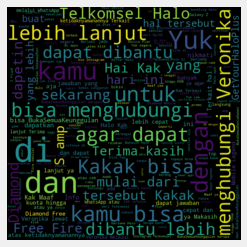

In [8]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=700, height=700, random_state=10, max_font_size=100).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [9]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Coba dong spill rencana kamu buat ngerayain ta...,0.000000,0.000000,Neutral
1,Sudah punya ide buat ngerayain tahun baruan na...,0.000000,0.000000,Neutral
2,Saatnya miliki Samsung Galaxy Z Flip4 5G atau ...,0.000000,0.000000,Neutral
3,Hari ini kamu bisa nikmati diskon 20% saat top...,0.700000,0.466667,Positive
4,Pilih nomor HP sesuai keinginan dan mudah diin...,0.000000,0.000000,Neutral
...,...,...,...,...
195,Keseruan Undi-Undi Hepi Telkomsel jangan sampa...,0.000000,0.000000,Neutral
196,Punya tips lain untuk memutus budaya ‘Toxic Pa...,0.000000,0.000000,Neutral
197,3. Say “sorry” saat kamu bikin salah.\nOrang t...,1.000000,-0.500000,Negative
198,2. Atur emosi dan hindari physical abuse sekec...,0.142857,0.000000,Neutral


In [10]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6) Puas mabar anti nge-lag dengan paket Games Speed Up.

Hanya dengan 15ribu kamu bisa dapat kuota 5GB &amp; pengalaman nge-game anti nge-lag yang sudah di verified Ookla. Aktifkan di MyTelkomsel atau  Akselerasi gamenya di aplikasi Game Speed Up ya. *S&amp;K Berlaku 

7) Main game nggak makan banyak memori karena ada GameQoo yang bisa bikin harimu jadi seru.

Cukup aktifkan paketnya Rp99.000 &amp; kamu bisa BukaSemuaKeunggulan main Toy Story 3, Star Wars, sampai Steel Rats tanpa perlu download.Yuk, aktivasi di  sekarang. *S&amp;K 

8) Semakin banyak diskon di berbagai merchant dan bonus Gold Poins dari Wawa game yang bisa kamu dapatkan hari ini.

Caranya ikutan keseruan Rezeki Poin Hepi dari Telkomsel dengan menukarkan 1 TelkomselPoin di apps MyTelkomsel atau klik  ya.

*S&amp;K 

9) Push rank bareng squad bikin pengen pakai hero andalan? Yuk BukaSemuaDuniaGames dan siapkan hero kamu!

Supaya hemat top up dulu 85 + 12 Diamond Mobile Legend senilai 30.273 dan

In [11]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) Hari ini kamu bisa nikmati diskon 20% saat top up Diamond Free Fire &amp; Mobile Legends. Selain itu, cukup 10.091 aja untuk dapetin Diamond Free Fire dan 16.146 aja untuk 53 + 6 Diamond Mobile Legends.

Yuk, kabarin squad mabar kamu dan kunjungi  sekarang! 

200) Mau ngasih hadiah Diamond untuk squad kamu? Pas banget! Spesial di hari ini ada penawaran menarik. Kamu bisa top up 140 + 27 Diamonds Free Fire seharga 25.227 atau 85 + 12 Diamonds Mobile Legends hanya 30.273 di 

Yuk, BukaSemuaDuniaGames sekarang! 

201) Isi terus Diamond kamu supaya bisa maksimal main dan dapetin item impian.

Di hari ini kamu bisa top up 140 + 27 Diamonds Free Fire seharga 25.227 atau 85 + 12 Diamonds Mobile Legends hanya 30.273. Lumayan banget!

Yuk, BukaSemuaDuniaGames di  

202) Good for you buat yang udah tahu punya target apa di tahun depan. Buat yang masih bingung, coba pikirin hal yang bisa bikin kamu bahagia dan BukaSemuaKeunggulan. Setelah itu, jadikan itu semangat 

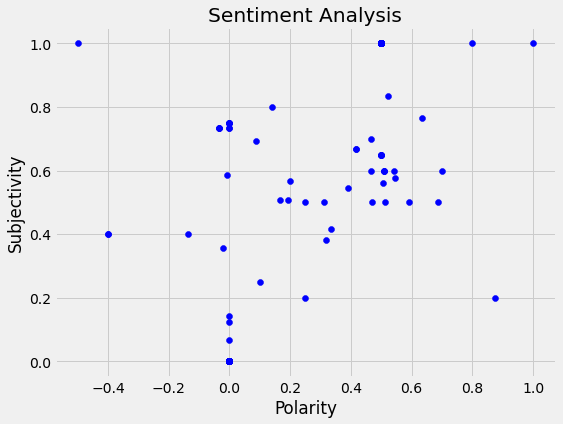

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
df['Analysis'].value_counts()

Neutral     107
Positive     84
Negative      9
Name: Analysis, dtype: int64

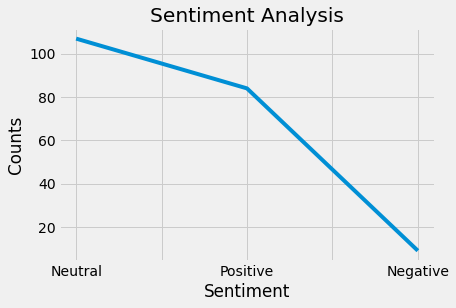

In [15]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

In [16]:
df['Analysis'].value_counts()

Neutral     107
Positive     84
Negative      9
Name: Analysis, dtype: int64

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   Subjectivity  200 non-null    float64
 2   Polarity      200 non-null    float64
 3   Analysis      200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.394150,0.194229
std,0.429166,0.265737
min,0.000000,-0.500000
25%,0.000000,0.000000
50%,0.133929,0.000000
75%,0.875000,0.500000
max,1.000000,1.000000


In [18]:
df.duplicated().sum()

14

In [19]:
df.isnull().sum()

Tweets          0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [20]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [21]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.000000,0.775226
Polarity,0.775226,1.000000


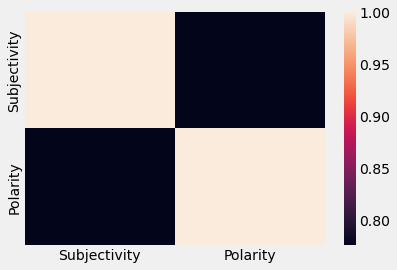

In [22]:
sns.heatmap(df.corr())